In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

#Preprocessing
from sklearn.preprocessing import StandardScaler
!pip install datasist
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 8.0 MB/s 
     |████████████████████████████████| 1.6 MB 39.8 MB/s 
     |████████████████████████████████| 82 kB 610 kB/s 


In [ ]:
df = pd.read_excel("/content/Data_Train.xlsx")

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
#Data description
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
#Converting the date from object type to datetime type
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

#Appending month, day and weekday to the dataset
df['Month'] = df['Date_of_Journey'].dt.month
df['WeekDay'] = df['Date_of_Journey'].dt.day_name()
df['Day'] = df['Date_of_Journey'].dt.day

#Adding seasons feature
def check_season(month):
    '''
    This function for checking the seasons based on the month.
    INPUT:
    month: int. The month number.
    OUTPUT:
    The season.
    '''
    if month == 1 or month == 2:
        return 'Winter'
    elif month == 3 or month == 4:
        return 'Spring'
    elif month == 5 or month == 6:
        return 'Summer'
    elif month == 7 or month == 8:
        return 'Monsoon'
    elif month == 9 or month == 10:
        return 'Autumn'
    else:
        return 'Pre Winter'
df['Season'] = df['Month'].apply(lambda month: check_season(month))
#lamdas is a function used to take any num of arguments but can have only one expression
#Appending weekend column
df['Weekend'] = df['WeekDay'].apply(lambda day: 1 if day == 'Sunday' else 0)

#Converting the duration to seconds
def convert_dur(duration):
    try:
        hr_to_sec = int(duration.split(' ')[0].replace('h',''))* 60 * 60
    except:
        hr_to_sec = 0
    try:
        min_to_sec = int(duration.split(' ')[1].replace('m','')) * 60
    except:
        min_to_sec = 0
    return hr_to_sec + min_to_sec
df['Duration'] = df['Duration'].apply(lambda dur:convert_dur(dur))

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day,Season,Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,10200,non-stop,No info,3897,3,Sunday,24,Spring,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,26700,2 stops,No info,7662,5,Wednesday,1,Summer,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,68400,2 stops,No info,13882,6,Sunday,9,Summer,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,19500,1 stop,No info,6218,5,Sunday,12,Summer,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,17100,1 stop,No info,13302,3,Friday,1,Spring,0


In [ ]:
#Required functions for visualization

def countplot(data,x,palette,title,fsize = None,y = None,hue = None):
    plt.figure(figsize = fsize)
    sns.countplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.xlabel(x.title(),color = 'red',size = 15)
    plt.xticks(rotation = 25)
    plt.ylabel("Count",color = 'red',size = 15)
    plt.title(title.title(),color = 'red',size = 15)
    if hue != None:
        plt.legend(title=hue.title())
    plt.show()

def barplot(data,x,y,palette,title,fsize = None,hue = None,estimator = mean):
    plt.figure(figsize = fsize)
    sns.barplot(data=data,x=x,y=y,palette=palette,hue=hue,estimator=estimator)
    plt.xlabel(x.title(),color = 'red',size = 15)
    plt.xticks(rotation = 25)
    plt.ylabel(y.title(),color = 'red',size = 15)
    plt.title(title.title(),color = 'red',size = 15)
    if hue != None:
        plt.legend(title=hue.title())
    plt.show()

def scatterplot(data,x,y,title):
    plt.xlabel(x.title(),color='red',size=15)
    plt.ylabel(y.title(),color='red',size=15)
    plt.title(title.title(),color='red',size=15)
    plt.show()

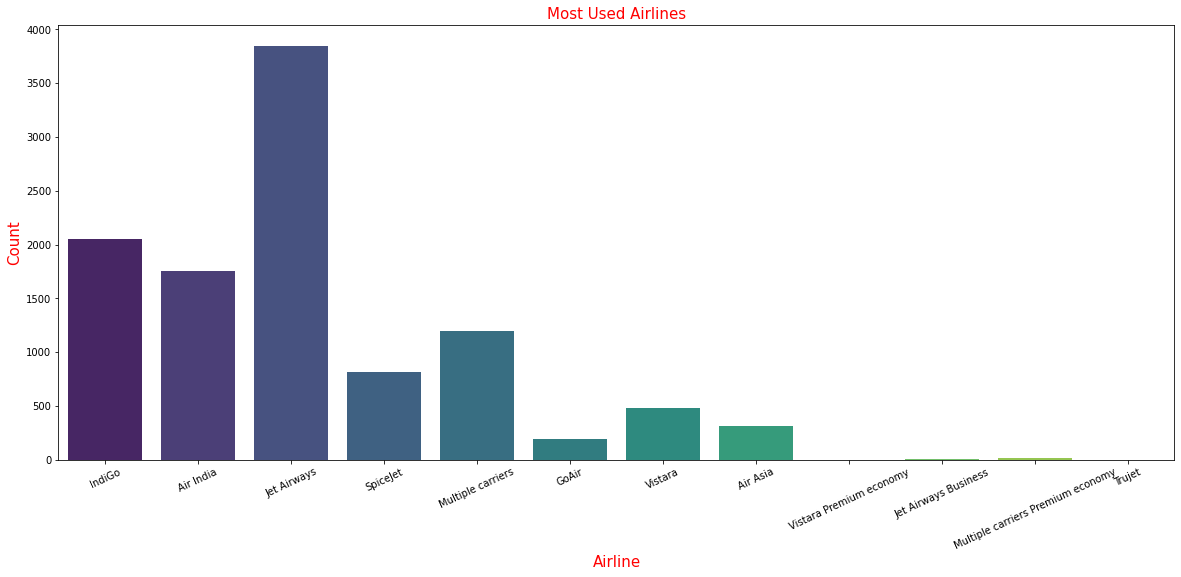

In [ ]:
countplot(df,'Airline','viridis','Most used airlines',(20,8))

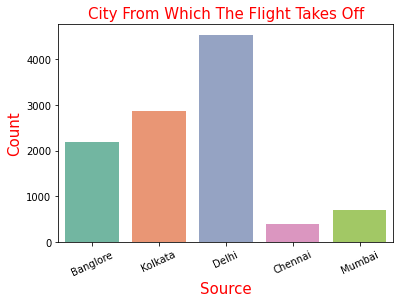

In [ ]:
countplot(df,'Source','Set2','City from which the flight takes off')

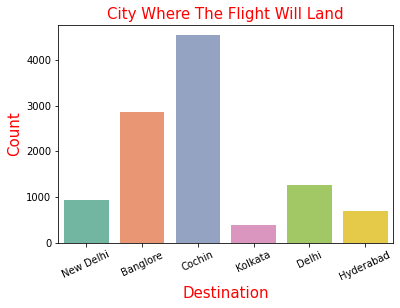

In [ ]:
countplot(df,'Destination','Set2','City where the flight will land')

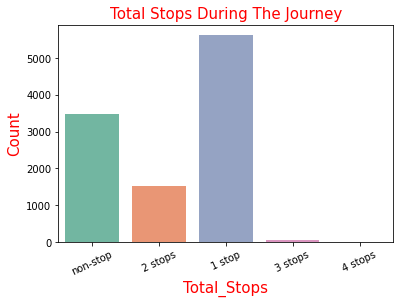

In [ ]:
countplot(df,'Total_Stops','Set2','Total stops during the journey')

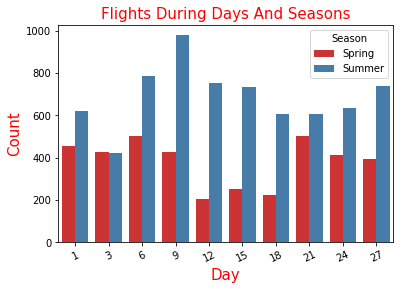

In [ ]:
countplot(df,'Day','Set1','Flights during days and seasons',hue = 'Season')

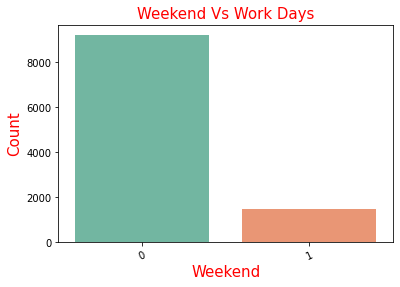

In [ ]:
countplot(df,'Weekend','Set2','Weekend VS Work days')

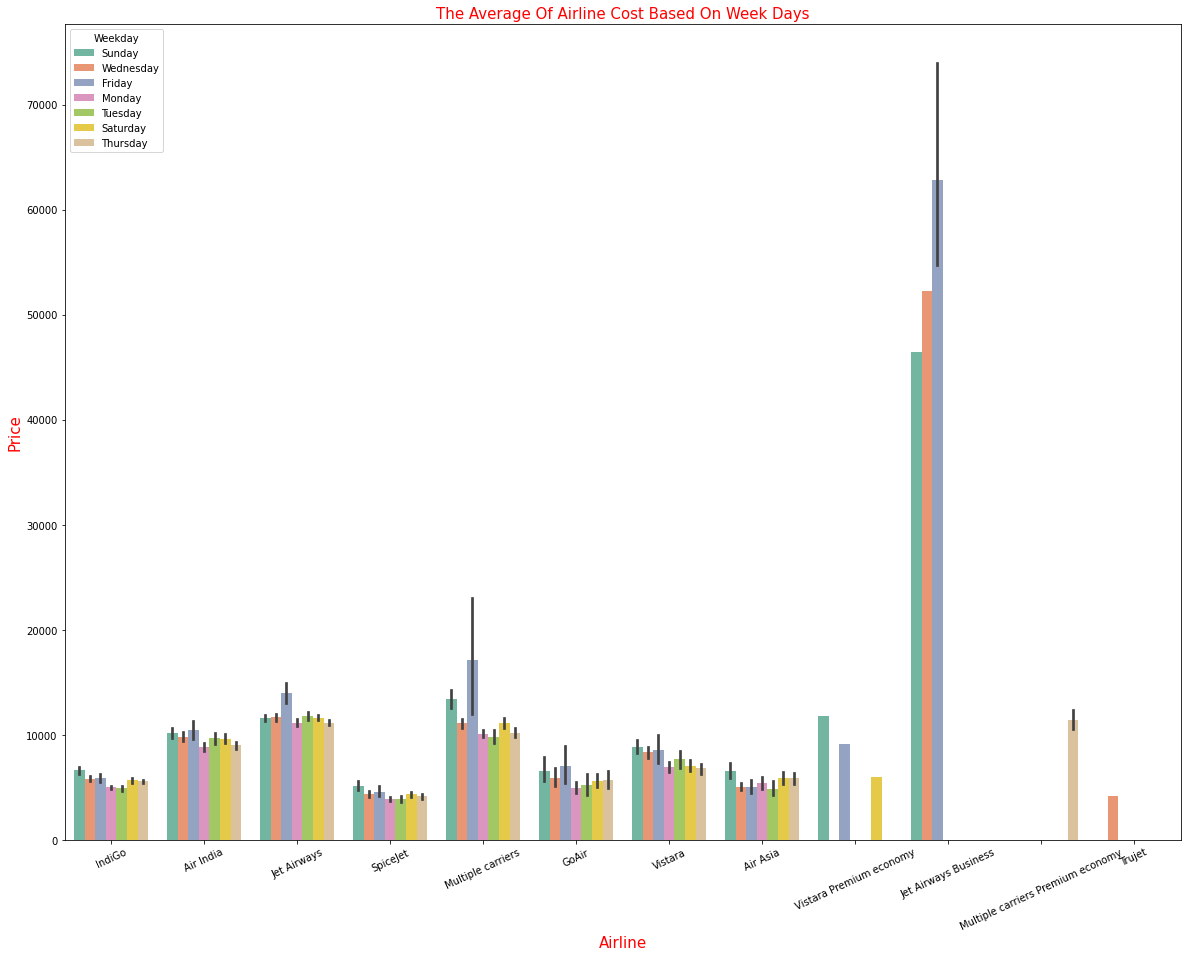

In [ ]:
barplot(df,'Airline','Price','Set2','The average of airline cost based on week days',(20,15),'WeekDay')

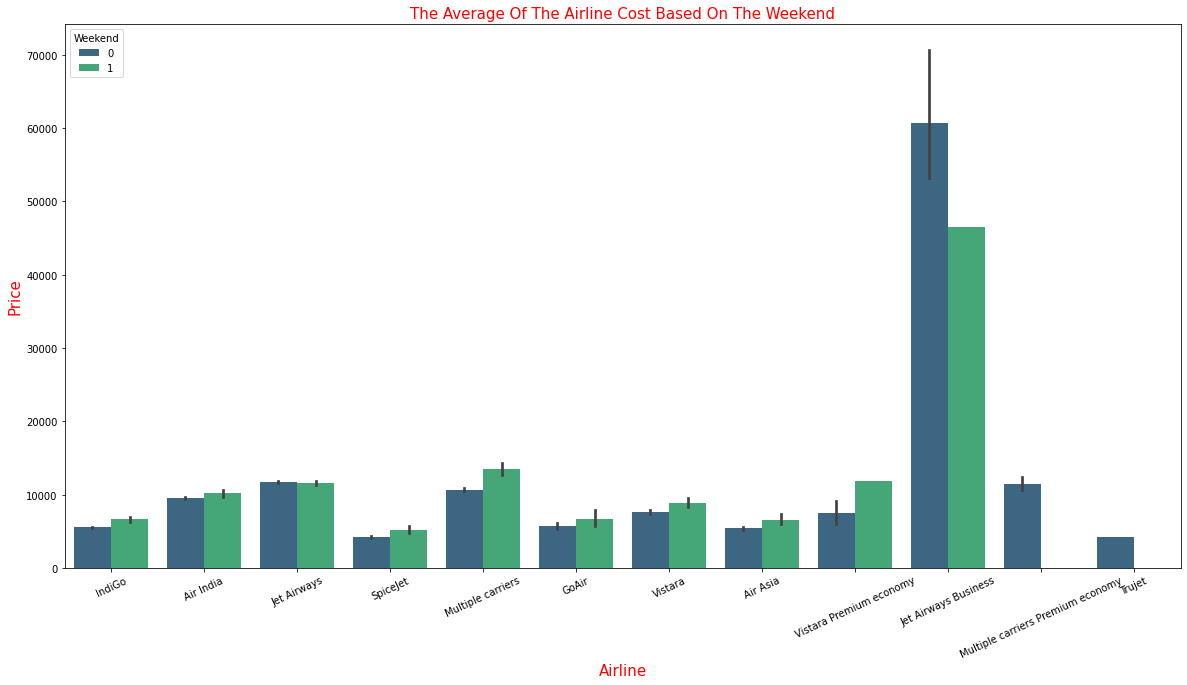

In [ ]:
barplot(df,'Airline','Price','viridis','The average of the airline cost based on the weekend',(20,10),'Weekend')

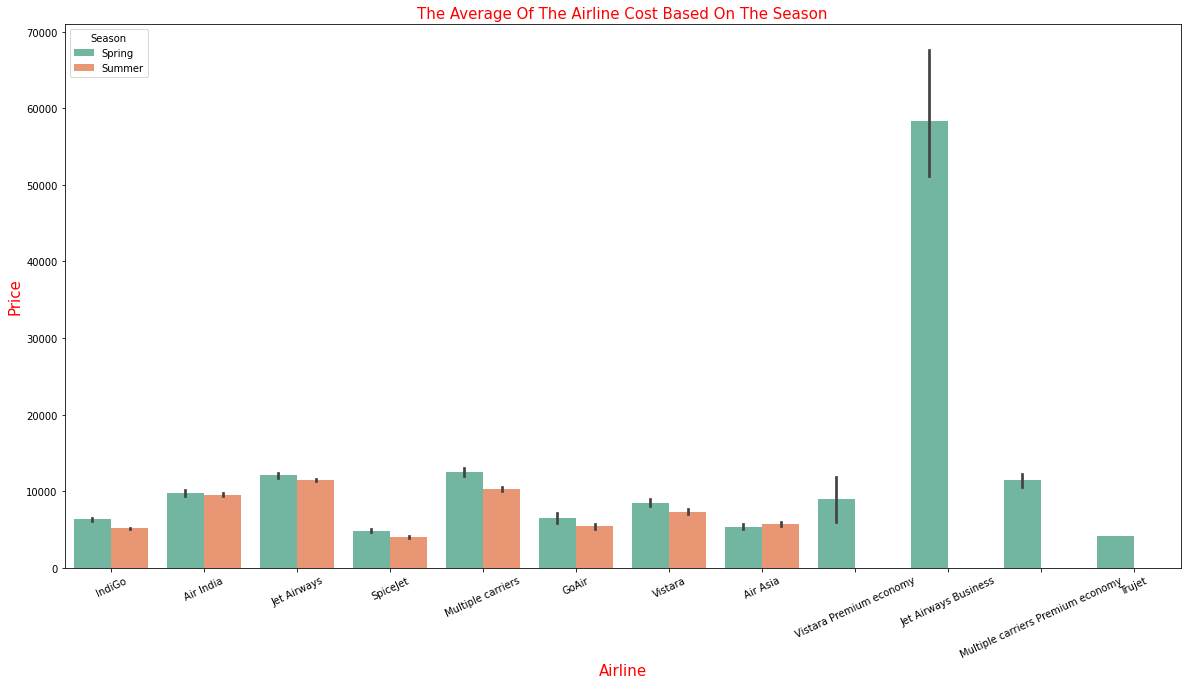

In [ ]:
barplot(df,'Airline','Price','Set2','The average of the airline cost based on the season',(20,10),'Season')

In [ ]:
#The unique values
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

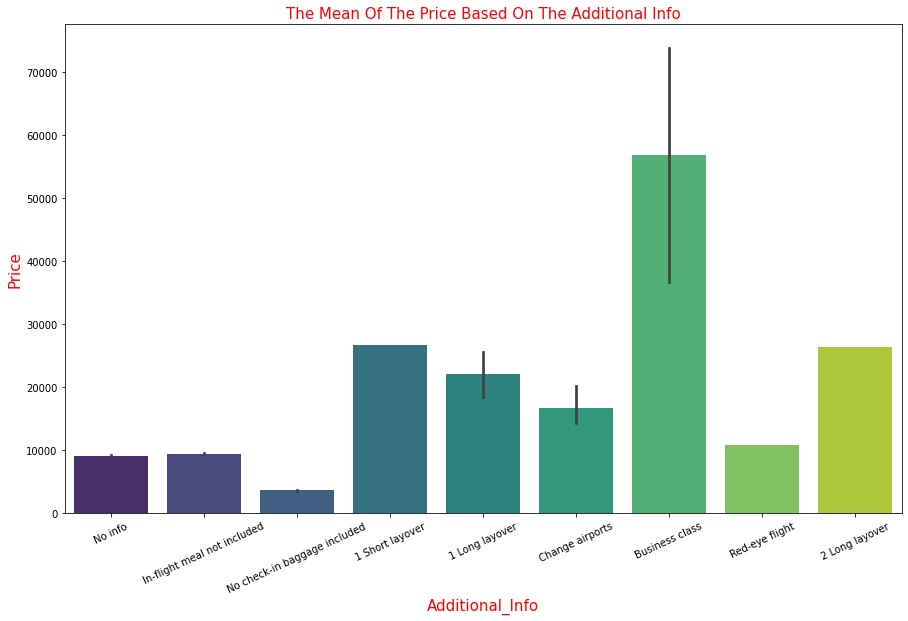

In [ ]:
#Unified No info value
df['Additional_Info'].replace({'No Info':'No info'},inplace = True)
ci = None # the black lines indicate mean value of the column ,these bars are called error bars and last bar doesnt have this bar because it is a null value
#this mean value is a std deviation
#The mean of the price for each case
barplot(df,'Additional_Info','Price','viridis','The mean of the price based on the additional info',(15,9))
 #viridis is used to provide color maps that are preceptionally uniformed in both color and b&w. also used for color blind people

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day,Season,Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,10200,non-stop,No info,3897,3,Sunday,24,Spring,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,26700,2 stops,No info,7662,5,Wednesday,1,Summer,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,68400,2 stops,No info,13882,6,Sunday,9,Summer,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,19500,1 stop,No info,6218,5,Sunday,12,Summer,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,17100,1 stop,No info,13302,3,Friday,1,Spring,0


In [ ]:
df_new = df.copy()

In [ ]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,WeekDay,Day,Season,Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,10200,non-stop,No info,3897,3,Sunday,24,Spring,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,26700,2 stops,No info,7662,5,Wednesday,1,Summer,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,68400,2 stops,No info,13882,6,Sunday,9,Summer,1
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,19500,1 stop,No info,6218,5,Sunday,12,Summer,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,17100,1 stop,No info,13302,3,Friday,1,Spring,0


In [ ]:
outliers_indices = detect_outliers(df_new,0,['Price'])
df_new.drop(outliers_indices,inplace = True)
len(outliers_indices)

94

In [ ]:
#Splitting the data to x and y
x = df_new.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Price'],axis = 1)
y = df_new['Price']

#Getting the dummies
x = pd.get_dummies(x,drop_first=True)

#The shape of x and y
print('X Shape:',x.shape)
print('Y Shape:',y.shape)

#Applying standard scaler
scaler = StandardScaler()
scaler.fit(x)
x_new = scaler.transform(x)

#Splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0,shuffle = False)

X Shape: (10589, 39)
Y Shape: (10589,)


In [ ]:
def performance(model,x_train,y_train,y_pred,y_test):

    print('Training Score:',model.score(x_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [ ]:
#Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

#The predicted data
lr_pred = lr.predict(x_test)

In [ ]:
performance(lr,x_train,y_train,lr_pred,y_test)

Training Score: 0.7024069170329503
Testing Score: -2.3169973497462512e+26
Other Metrics In Testing Data: 
MSE: 3.813087314915417e+33
MAE: 1341761719269106.2
